In [1]:
import astropy
import astropy.io.fits as pyfits
import matplotlib
import matplotlib.pyplot as pyplot

filename='https://www.dropbox.com/s/puubem9bu8j8x21/hlsp_misty_illustris_jwst-nircam_f277w_FIELDA_11_10_v1_lightcone.fits?dl=1'
hdu_list=pyfits.open(filename)
print(hdu_list.info())

Filename: /Users/gsnyder/.astropy/cache/download/py3/32c50ead99c84454ff8e94d6d408be38
No.    Name         Type      Cards   Dimensions   Format
  0  IMAGE_NOPSF  PrimaryHDU      12   (2631, 2631)   float64   
  1  IMAGE_PSF   ImageHDU         8   (2631, 2631)   float64   
  2  MODELPSF    ImageHDU         9   (59, 59)   float64   
  3  Catalog     BinTableHDU    129   15374R x 60C   [K, K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 11A, K, K, D, D, D, K, K, D, D, D, D, K, K, D, D, K, 111A, L, D, D]   
None


In [2]:
hdu_list['IMAGE_NOPSF'].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2631                                                  
NAXIS2  =                 2631                                                  
EXTEND  =                    T                                                  
FILTER  = 'jwst-nircam_f277w'                                                   
PIXSIZE =               0.0648 / arcsec                                         
UNIT    = 'nanoJanskies'       / per pixel                                      
ABZP    =    31.40006562228223 / AB mag zeropoint                               
PHOTFNU =             2.25E-08 / Jy; approx flux[Jy] at 1 count/sec             
EXTNAME = 'IMAGE_NOPSF'                                                         

In [3]:
cat=hdu_list['catalog'].data
print(np.asarray(cat.columns.names))
newi=cat['new_i'] ; newj=cat['new_j']

['snapshot' 'SubfindID' 'ra_deg' 'dec_deg' 'ra_kpc' 'dec_kpc'
 'ra_kpc_inferred' 'dec_kpc_inferred' 'true_z' 'inferred_z' 'peculiar_z'
 'true_kpc_per_arcsec' 'X_cmpc' 'Y_cmpc' 'Z_cmpc' 'ADD_cmpc'
 'ADD_cmpc_inferred' 'snapshot_z' 'geometric_z' 'cylinder_number'
 'mstar_msun_rad' 'mgas_msun_rad' 'subhalo_mass_msun' 'bhmass_msun_rad'
 'mbary_msun_rad' 'sfr_msunperyr_rad' 'bhrate_code' 'camX_mpc' 'camY_mpc'
 'camZ_mpc' 'g_AB_absmag' 'r_AB_absmag' 'i_AB_absmag' 'z_AB_absmag'
 'v_kms_camX' 'v_kms_camY' 'v_kms_camZ' 'v_kms_hubble' 'g_AB_appmag' 'sim'
 'snap' 'sfid' 'z' 'RA' 'DEC' 'origin_i' 'origin_j' 'pos_i' 'pos_j'
 'pixsize_arcsec' 'final_fov_arcsec' 'full_npix' 'this_npix' 'this_fov_kpc'
 'halfmassrad_factor' 'nrays' 'run_dir' 'success' 'new_i' 'new_j']


In [4]:
image=hdu_list['IMAGE_PSF'].data
print(image.shape)

(2631, 2631)


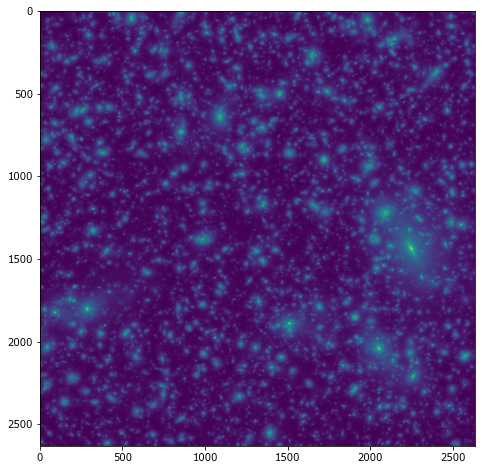

In [12]:
fig=pyplot.figure(figsize=(16,8))
pyplot.imshow(np.log10(image+1.0e-1))
pyplot.show()

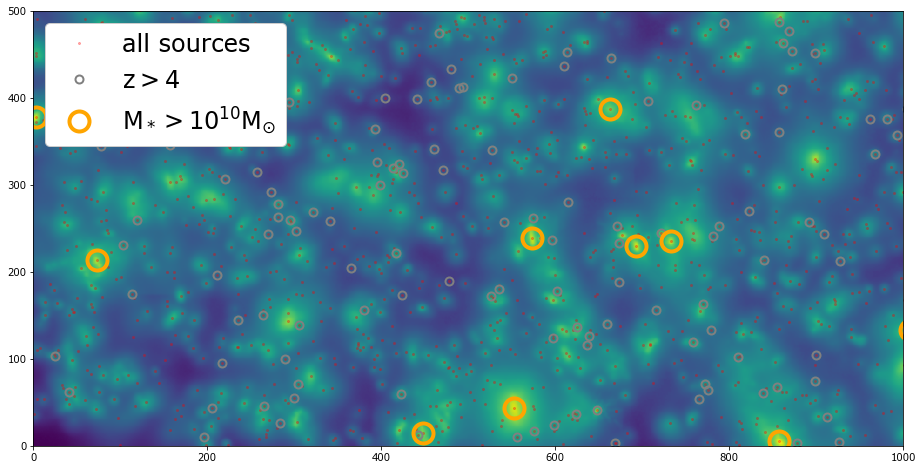

In [40]:
fig=pyplot.figure(figsize=(16,8))
pyplot.imshow(np.log10(image[0:500,0:1000]+1.0e-3))
pyplot.plot(newj,newi,'or',markersize=2,alpha=0.3) ; pyplot.xlim(0,1000) ; pyplot.ylim(0,500)
z=cat['true_z']
zi= z > 4
pyplot.plot(newj[zi],newi[zi],marker='o',markersize=8,markerfacecolor='None',markeredgecolor='Gray',linestyle='None',markeredgewidth=2)
m=cat['mstar_msun_rad']
mi=m>1.0e10
pyplot.plot(newj[mi],newi[mi],marker='o',markersize=20,markerfacecolor='None',markeredgecolor='Orange',linestyle='None',markeredgewidth=4)
pyplot.legend(['all sources',r'$z > 4$',r'$M_* > 10^{10} M_{\odot}$'],loc='upper left',fontsize=24,framealpha=1.0)
pyplot.show()